# Text modeling

HI everyone! Today, we're exploring natural language processing. First, we will learn about linguistic features that our documents contain. We will then move on to deeper representations of our corpora and move on to text classification. We will be using `Scikit-learn`, `TextBlob`, and `SpaCy` for this notebook. We'll be taking a look at spam messages for this session. 

To install `spacy` and its models properly on the **terminal**:

`pip3 install spacy`

`python3 -m spacy download en_core_web_sm`

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

### Data exploration

In [7]:
# Import messages into dataframe
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Desribe our dataset
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4824   4515                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029782656A20>,
      dtype=object)

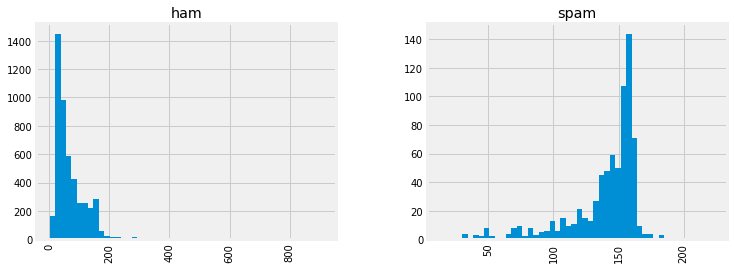

In [9]:
messages['length'] = messages['message'].apply(len)
messages.hist(column='length', by='label', bins=50, figsize=(12,4))

We can note here that spam messages usually contain more characters compared to real messages. 

-----

### Text Segmentation

In [10]:
from textblob import Word, TextBlob

Let's take a look at the message at index 219

In [11]:
message = messages['message'][219]
message

"Yeah you should. I think you can use your gt atm now to register. Not sure but if there's anyway i can help let me know. But when you do be sure you are ready."

In [12]:
blob = TextBlob(message)
blob

TextBlob("Yeah you should. I think you can use your gt atm now to register. Not sure but if there's anyway i can help let me know. But when you do be sure you are ready.")

Let's try to split our text data into more meaningful pieces. First, into separate sentences. Second, into separate terms. Generally, we call this process **tokenization**.

In [13]:
blob.sentences

[Sentence("Yeah you should."),
 Sentence("I think you can use your gt atm now to register."),
 Sentence("Not sure but if there's anyway i can help let me know."),
 Sentence("But when you do be sure you are ready.")]

In [14]:
sentence = blob.sentences[1]
sentence.words

WordList(['I', 'think', 'you', 'can', 'use', 'your', 'gt', 'atm', 'now', 'to', 'register'])

In [16]:
blob.correct()

TextBlob("Yeah you should. I think you can use your it at now to register. Not sure but if there's anyway i can help let me know. But when you do be sure you are ready.")

TextBlob has a feature that extracts noun phrases, a group of words that form the subject, object, or prepositional object of a sentence. This feature isn't perfect, though. 

We can also get word counts like last time.

In [16]:
import nltk
nltk.download('brown')
blob.noun_phrases

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\limri\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


WordList(['yeah', 'gt atm'])

In [17]:
blob.word_counts

defaultdict(int,
            {'yeah': 1,
             'you': 4,
             'should': 1,
             'i': 2,
             'think': 1,
             'can': 2,
             'use': 1,
             'your': 1,
             'gt': 1,
             'atm': 1,
             'now': 1,
             'to': 1,
             'register': 1,
             'not': 1,
             'sure': 2,
             'but': 2,
             'if': 1,
             'there': 1,
             's': 1,
             'anyway': 1,
             'help': 1,
             'let': 1,
             'me': 1,
             'know': 1,
             'when': 1,
             'do': 1,
             'be': 1,
             'are': 1,
             'ready': 1})

----

### Linguistic features
Text naturally has several features of interest. We will take a look at parts of speech and lemmas of terms in sentences. We will also take a look at word synonyms and definitions

**Parts of speech** (POS) refer to the function of terms in a given statement (e.g. noun, verb, etc.). POS tagging is a statistical rule-based approach that determines the likely categorization of words in a statement given context. A comprehensive list of tags is found at http://www.clips.ua.ac.be/pages/mbsp-tags.

In [15]:
nltk.download('averaged_perceptron_tagger')
sentence.tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\limri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('I', 'PRP'),
 ('think', 'VBP'),
 ('you', 'PRP'),
 ('can', 'MD'),
 ('use', 'VB'),
 ('your', 'PRP$'),
 ('gt', 'NNS'),
 ('atm', 'RB'),
 ('now', 'RB'),
 ('to', 'TO'),
 ('register', 'NN')]

**Lemma** are the most rudimentary forms or inflections of words, such as the root of nouns (matrices -> matrix) or present tenses of verbs (threw -> throw). These can be derived through lemmatization. Here in TextBlob, it uses existing lexicons and their respective lemmas to statistically infer the lemmas of provided words. 

The `lemmatize()` method has an optional parameter:
    - 'n' for noun (default)
    - 'v' for verb
    - 'a' for adjective
    - 'r' for adverb (doesn't always work)

In [16]:
w = Word('went')
w.lemmatize('v')

'go'

In [17]:
w = Word('alumnae')
w.lemmatize('n')

'alumna'

In [18]:
w = Word('stronger')
w.lemmatize('a')

'strong'

Inside TextBlob, we can also pluralize and find synonyms and definitions of words. It can also correct possible spelling errors in text. It can even compare similarities between words! Lastly, it can do translation.

In [19]:
w = Word('corpora')
w.pluralize()

'corporas'

In [20]:
w = Word('corpora')
w.singularize()

'corpus'

In [21]:
w = Word('eat')
list(zip(w.synsets, w.definitions))

[(Synset('eat.v.01'), 'take in solid food'),
 (Synset('eat.v.02'), 'eat a meal; take a meal'),
 (Synset('feed.v.06'), 'take in food; used of animals only'),
 (Synset('eat.v.04'), 'worry or cause anxiety in a persistent way'),
 (Synset('consume.v.05'), 'use up (resources or materials)'),
 (Synset('corrode.v.01'),
  'cause to deteriorate due to the action of water, air, or an acid')]

In [22]:
w = Word('havv')
w.correct()

'have'

In [23]:
apple = Word('apple').synsets[0]
orange = Word('orange').synsets[0]
apple.path_similarity(orange)

0.25

In [24]:
b = TextBlob('Je suis Will.')
b.detect_language()

'fr'

In [25]:
b.translate(from_lang='fr', to='en')

TextBlob("I am Will.")

----

### Exercises

##### Get the message at index 518 and make it into a blob. 

In [96]:
# Your answer here
exercise = messages['message'][518]
blob = TextBlob(exercise)
blob

TextBlob("That way transport is less problematic than on sat night. By the way, if u want to ask  n  to join my bday, feel free. But need to know definite nos as booking on fri. ")

##### Print the first 5 unique POS tags in blob

In [97]:
# Your answer here
tags = blob.tags
tag_df = pd.DataFrame(tags, columns = ['word','pos'])
unique_pos = list(tag_df.pos.unique())[:5]
unique_pos

['DT', 'NN', 'VBZ', 'RBR', 'JJ']

##### Find all the lemmas (of all nouns and verbs) in blob

In [106]:
# Your answer here
nouns = list(Word(x).lemmatize('n') for x,y in list(blob.pos_tags) if y.startswith('NN'))
verbs = list(Word(x).lemmatize('v') for x,y in list(blob.pos_tags) if y.startswith('VB'))
nouns
#list(blob.words)

['way', 'transport', 'night', 'way', 'n', 'bday', 'fri']

In [99]:
verbs

['ask', 'join', 'feel', 'know']

##### List all words in blob that are plural (with index of each word)

In [104]:
# Your anwer here
not_pluralized = list(x for x in list(blob.words))
pluralized = list(x.pluralize() for x in list(blob.words))
plural = []
for x in range(0,len(pluralized)):
    if not_pluralized[x] == pluralized[x]:
        plural.append(pluralized[x])
plural

[]

----

### Using SpaCy

In [107]:
import spacy
from spacy import displacy
try:
    nlp = spacy.load('en_core_web_sm')
except:
    print("Error loading 'en_core_web_sm' model.")

![title](spacy_pipeline.png)

In [108]:
doc = nlp(str(sentence))
tokens = pd.DataFrame(columns=
                      ['text', 'lemma', 'pos', 'tag',
                       'dependency', 'shape', 'is_alphabet',
                       'is_stopword', 'head_text', 'head_pos'])

for token in doc:
    data = [token.text, token.lemma_, token.pos_,
            token.tag_, token.dep_, token.shape_,
            token.is_alpha, token.is_stop,
            token.head.text, token.head.pos_]
    tokens.loc[len(tokens)] = data
tokens

,text,lemma,pos,tag,dependency,shape,is_alphabet,is_stopword,head_text,head_pos
0,I,-PRON-,PRON,PRP,nsubj,X,True,True,think,VERB
1,think,think,VERB,VBP,ROOT,xxxx,True,False,think,VERB
2,you,-PRON-,PRON,PRP,nsubj,xxx,True,True,use,VERB
3,can,can,VERB,MD,aux,xxx,True,True,use,VERB
4,use,use,VERB,VB,ccomp,xxx,True,False,think,VERB
5,your,-PRON-,DET,PRP$,poss,xxxx,True,True,atm,VERB
6,gt,gt,NOUN,NN,compound,xx,True,False,atm,VERB
7,atm,atm,VERB,VB,dobj,xxx,True,False,use,VERB
8,now,now,ADV,RB,advmod,xxx,True,True,use,VERB
9,to,to,PART,TO,aux,xx,True,True,register,VERB


In [109]:
s = 'Apple’s iOS 13 is here — or rather, the public beta for iOS 13 has arrived,giving the masses their first chance to take Apple’s latest operating system for a spin.'
doc = nlp(s)
displacy.render(doc, style='ent', jupyter=True)